In [249]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.5.0


In [250]:
def simple_moving_window(signal,window_size):
    import numpy as np
    windowed_signal = []
    for i in range(len(signal)-(window_size-1)):
        window = signal[i:i+window_size]
        windowed_signal.append(window)
    return np.array(windowed_signal)
def split_and_shuffle(windowed_signal):
    from sklearn.model_selection import train_test_split
    train_df, test_df = train_test_split(windowed_signal, test_size=0.2,shuffle=False)
    return train_df,test_df 
def feature_label_split(windowed_signal,prediction_length):
    from numpy import array
    features = []
    labels = []
    for window in windowed_signal:
        features.append(window[:-prediction_length])
        labels.append(window[-prediction_length:])
    return array(features),array(labels)

In [264]:
x = np.linspace(0,999,1000)
y = np.sin(x/50)
"""
window size has to be bigger than prediction length. just because of my engineering. you could change variables.
"""
prediction_length = 80
window_size = 100

y_windowed = simple_moving_window(signal=y,window_size=window_size)
train,test = split_and_shuffle(windowed_signal=y_windowed)
test_features,test_labels = feature_label_split(test,prediction_length=prediction_length)
train_features,train_labels = feature_label_split(train,prediction_length=prediction_length)

In [265]:
number_of_hidden_layer_neurons = 100
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=number_of_hidden_layer_neurons, activation='relu',input_shape=(train_features.shape[-1],)),
    tf.keras.layers.Dense(prediction_length)
])

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=2,
                                                mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_features,train_labels, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping])

Epoch 1/100
23/23 [==============================] - 0s 897us/step - loss: 0.4240 - mean_absolute_error: 0.5652
Epoch 2/100
23/23 [==============================] - 0s 831us/step - loss: 0.2769 - mean_absolute_error: 0.4492
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2215 - mean_absolute_error: 0.3961
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1547 - mean_absolute_error: 0.3246
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0798 - mean_absolute_error: 0.2263
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0271 - mean_absolute_error: 0.1247
Epoch 7/100
23/23 [==============================] - 0s 860us/step - loss: 0.0067 - mean_absolute_error: 0.0595
Epoch 8/100
23/23 [==============================] - 0s 790us/step - loss: 0.0024 - mean_absolute_error: 0.0364
Epoch 9/100
23/23 [==============================] - 0s 931us/step - loss: 0.0015 - mean_absolute_error: 0.0285


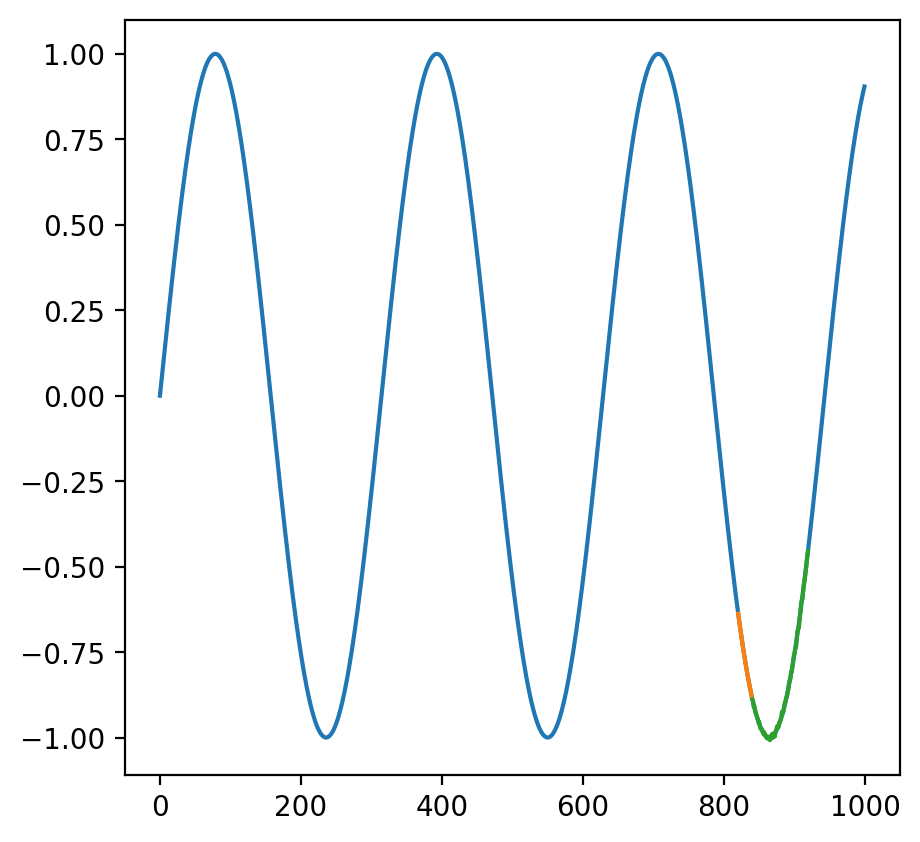

In [266]:
fig,axes = plt.subplots(1,1,figsize=(5,5),dpi=200)
plt.plot(x,y)

predictions = model.predict(test_features)

train_size = train.shape[0]
feature_id = 100
plt.plot(x[train_size+feature_id:train_size+feature_id+(window_size-prediction_length)],test_features[feature_id])

plt.plot(x[train_size+feature_id+(window_size-prediction_length):train_size+feature_id+window_size],predictions[feature_id])
